# 조건
- imagedatagenerator: vrotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    rescale=1./255
- flow_from_directory: directory=data_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    seed=123,
    subset='training',
    interpolation='nearest',
    shuffle=True
- 은닉층 2개
- softmax
- epoch=30

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.test.is_gpu_available() 

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
# 데이터 준비
## 데이터셋 준비
data_dir = 'data/archive'
batch_size = 32
img_height = 64
img_width = 64



## 데이터 셋 로드
train_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    rescale=1./255)

train_ds= train_gen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    seed=123,
    subset='training',
    interpolation='nearest',
    shuffle=True
)

val_ds= train_gen.flow_from_directory(
directory=data_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    seed=123,
    subset='validation',
    interpolation='nearest',
    shuffle=False
    
)
print(train_ds.class_indices)
print(val_ds.class_indices)


Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.
{'closed_eye': 0, 'open_eye': 1}
{'closed_eye': 0, 'open_eye': 1}


In [4]:
## CNN 모델 설계
model = Sequential()
## 특징 추출부 시작
### Conv2D
model.add(Conv2D( # 특징 찾기
    filters = 16,                           # 찾을 특징의 개수
    kernel_size = (3,3),                    # 특징의 크기 (거의 고정), 수정이 거의 없는 편
    input_shape = (img_height,img_width,1), # 입력 이미지 크기, 컬러 : 3, 흑백 : 1 , 첫번째에서만 작성
    activation = 'relu'                     # 규칙 찾는 방법
))
### MaxPool2D
model.add(MaxPool2D(  # 특징이 아닌 부분 삭제
    pool_size = (2,2) # (2,2)에서 하나만 사용하겠다
))

# 은닉층1
### Conv2D
model.add(Conv2D( # 특징 찾기
    filters = 32,                           # 찾을 특징의 개수
    kernel_size = (3,3),                    # 특징의 크기 (거의 고정), 수정이 거의 없는 편
    activation = 'relu'                     # 규칙 찾는 방법
))
### MaxPool2D
model.add(MaxPool2D(  # 특징이 아닌 부분 삭제
    pool_size = (2,2) # (2,2)에서 하나만 사용하겠다
))

# # 은닉층2
### Conv2D
model.add(Conv2D( # 특징 찾기
    filters = 64,                          # 찾을 특징의 개수
    kernel_size = (3,3),                    # 특징의 크기 (거의 고정), 수정이 거의 없는 편
    activation = 'relu'                     # 규칙 찾는 방법
))
### MaxPool2D
model.add(MaxPool2D(  # 특징이 아닌 부분 삭제
    pool_size = (2,2) # (2,2)에서 하나만 사용하겠다
))

# # # 은닉층3
# # ### Conv2D
# model.add(Conv2D( # 특징 찾기
#     filters = 256,                          # 찾을 특징의 개수
#     kernel_size = (3,3),                    # 특징의 크기 (거의 고정), 수정이 거의 없는 편
#     activation = 'relu'                     # 규칙 찾는 방법
# ))
# ### MaxPool2D
# model.add(MaxPool2D(  # 특징이 아닌 부분 삭제
#     pool_size = (2,2) # (2,2)에서 하나만 사용하겠다
# ))




In [5]:
## dropout
model.add(layers.Dropout(0.25))
### 특징 추출부와 분류 분석부를 연결
model.add(Flatten()) # 데이터를 1차원으로 만들기 

### 분류 분석부 시작 (1차원 데이터가 필요)

model.add(Dense(units=32, activation = 'relu')) 
model.add(Dense(units=2, activation = 'softmax'))



In [6]:
### 모델 컴파일
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)



In [7]:
# # 모델 학습
# epochs = 30
# history = model.fit_generator(
#   generator=train_ds,
#   validation_data=train_ds,
#   epochs=epochs
# )

In [8]:
# # 모델 학습
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
1200/1200 [==============================] - 28s 24ms/step - loss: 0.4163 - accuracy: 0.8063 - val_loss: 0.3318 - val_accuracy: 0.8654
Epoch 2/20
1200/1200 [==============================] - 28s 24ms/step - loss: 0.2149 - accuracy: 0.9186 - val_loss: 0.3532 - val_accuracy: 0.8617
Epoch 3/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.1341 - accuracy: 0.9501 - val_loss: 0.3718 - val_accuracy: 0.8556
Epoch 4/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.1001 - accuracy: 0.9637 - val_loss: 0.2745 - val_accuracy: 0.8829
Epoch 5/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.0815 - accuracy: 0.9704 - val_loss: 0.2233 - val_accuracy: 0.9132
Epoch 6/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.0716 - accuracy: 0.9739 - val_loss: 0.2722 - val_accuracy: 0.8944
Epoch 7/20
1200/1200 [==============================] - 28s 24ms/step - loss: 0.0645 - accuracy: 0.9768 - val_loss: 0.2831 -

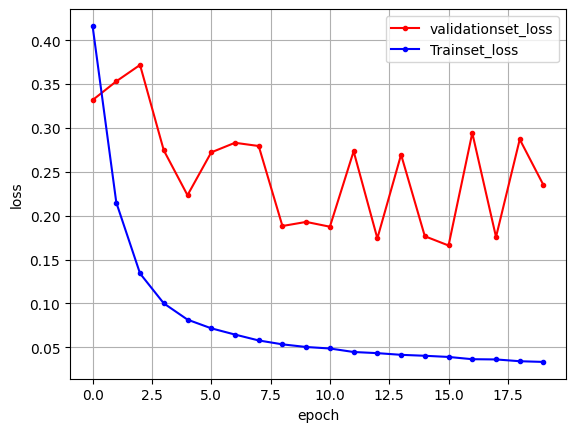

In [9]:
# 그래프 표시
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss, marker = '.', c="red", label='validationset_loss')
plt.plot(x_len,y_loss, marker = '.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


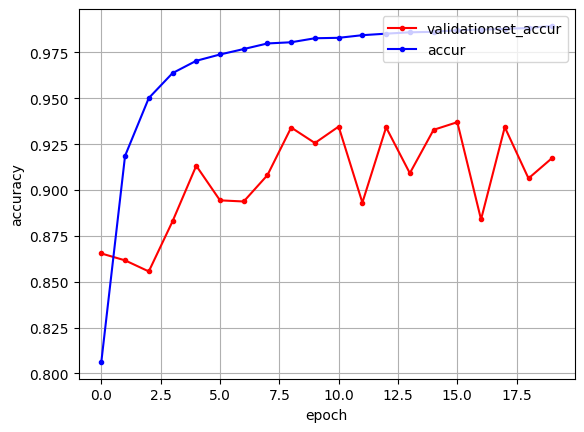

In [10]:
# # 그래프 표시
y_vaccur = history.history['val_accuracy']
y_accur = history.history['accuracy']

x_len = np.arange(len(y_accur))
plt.plot(x_len,y_vaccur, marker = '.', c="red", label='validationset_accur')
plt.plot(x_len,y_accur, marker = '.', c="blue", label='accur')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [11]:
# 모델 저장
model.save('model/Test0429_4_3.h5')

In [12]:
# history csv로 저장
import pandas as pd
data = {'loss':history.history['loss'],'accuracy':history.history['accuracy'],
        'val_loss':history.history['val_loss'],'val_accuracy':history.history['val_accuracy']}
df = pd.DataFrame(data, index = range(1,21))
df.to_csv('Test0429_4_3.csv')
df

,loss,accuracy,val_loss,val_accuracy
1,0.416321,0.806302,0.331755,0.865417
2,0.214943,0.918620,0.353188,0.861667
3,0.134123,0.950130,0.371834,0.855625
4,0.100073,0.963724,0.274538,0.882917
5,0.081498,0.970443,0.223339,0.913229
6,0.071614,0.973880,0.272172,0.894375
7,0.064494,0.976849,0.283112,0.893750
8,0.057766,0.979896,0.279420,0.908125
9,0.053331,0.980547,0.188229,0.934062
10,0.050307,0.982734,0.192903,0.925625
